---
title: "Tutorial 2"
execute:
  # echo: false
  freeze: auto  # re-render only when source changes
format:
  html:
    code-fold: false
    code-summary: "Show the code"
---

## Topics

1. Summary statistics
1. Quantiles
1. Histograms
1. Encoding categorical varaibles

## Important Python Packages
* Pandas
* Seaborn
* Matplotlib

In [1]:
# import necessary packages
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## Today's datasets

* City Temperatures -- Daily temperature for different international cities (<a href="city_temp.csv" download>download .csv here</a>)

In [2]:
# read CSV
temp_df = pd.read_csv('city_temp.csv')

In [3]:
# examine the data -- in visual studio code we can also do this another way
temp_df

,Country,City,Month,Day,Year,AvgTemperature
0,Malawi,Lilongwe,1,1,1995,69.5
1,Malawi,Lilongwe,1,2,1995,69.5
2,Malawi,Lilongwe,1,3,1995,67.5
3,Malawi,Lilongwe,1,4,1995,68.5
4,Malawi,Lilongwe,1,5,1995,66.7
...,...,...,...,...,...,...
47392,US,Rochester,5,9,2020,33.9
47393,US,Rochester,5,10,2020,41.4
47394,US,Rochester,5,11,2020,40.7
47395,US,Rochester,5,12,2020,38.9


In [4]:
# which cities do we have data for
temp_df['City'].unique()

array(['Lilongwe', 'Capetown', 'Tel Aviv', 'Amman', 'Beirut', 'Rochester'],
      dtype=object)

In [5]:
# isolate data from a single city (e.g., Tel Aviv)
city = 'Tel Aviv'
TA_temp = temp_df.loc[temp_df['City'] == city]
TA_temp

,Country,City,Month,Day,Year,AvgTemperature
14959,Israel,Tel Aviv,1,1,1995,57.3
14960,Israel,Tel Aviv,1,2,1995,56.1
14961,Israel,Tel Aviv,1,3,1995,55.9
14962,Israel,Tel Aviv,1,4,1995,56.9
14963,Israel,Tel Aviv,1,5,1995,56.6
...,...,...,...,...,...,...
19595,Israel,Tel Aviv,9,11,2007,79.5
19596,Israel,Tel Aviv,9,12,2007,79.7
19597,Israel,Tel Aviv,9,13,2007,79.7
19598,Israel,Tel Aviv,9,14,2007,79.6


In [6]:
# get summary statistics for a single city
TA_temp['AvgTemperature'].describe()

count    4641.000000
mean       54.020448
std        50.624184
min       -99.000000
25%        59.400000
50%        68.700000
75%        78.600000
max        88.500000
Name: AvgTemperature, dtype: float64

In [7]:
TA_temp = TA_temp.loc[TA_temp['AvgTemperature']>(-50)]


In [8]:
# convert to Celsius
TA_temp['AvgTemp_C'] = (TA_temp['AvgTemperature'] - 32)*(5/9)

/var/folders/wn/2bz1970d2w5182zy7h96yfcc0000gn/T/ipykernel_82655/3623248864.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TA_temp['AvgTemp_C'] = (TA_temp['AvgTemperature'] - 32)*(5/9)


In [9]:
# get summary stasitics in Celsius
TA_temp['AvgTemp_C'].describe()

count    4196.000000
mean       21.249325
std         5.193370
min         7.277778
25%        16.555556
50%        21.611111
75%        26.277778
max        31.388889
Name: AvgTemp_C, dtype: float64

In [10]:
# get the mean for the city you chose
mean_temp = TA_temp['AvgTemp_C'].mean() 
print(f"The mean temperature in {city} is: {mean_temp:.2f} degrees Celcius")

The mean temperature in Tel Aviv is: 21.25 degrees Celcius


In [11]:
# get the median temperature for the city you chose
median_temp = TA_temp['AvgTemp_C'].median() 
print(f"The median temperature in {city} is: {median_temp:.2f} degrees Celcius")

The median temperature in Tel Aviv is: 21.61 degrees Celcius


In [12]:
# get the 10th percentile for the city you chose
percentile_10 = TA_temp['AvgTemp_C'].quantile(.1) 
print(f"The tenth percentile in {city} is: {percentile_10:.2f} degrees Celcius")

The tenth percentile in Tel Aviv is: 14.17 degrees Celcius


In [13]:
# get the 90th percentile for the city you chose
percentile_90 = TA_temp['AvgTemp_C'].quantile(.9) 
print(f"The ninetieth percentile in {city} is: {percentile_90:.2f} degrees Celcius")

The ninetieth percentile in Tel Aviv is: 27.67 degrees Celcius


In [14]:
# begin plotting
sns.set_theme(style="whitegrid")

[Text(0.5, 0, 'Average Daily Temperature in Tel Aviv')]

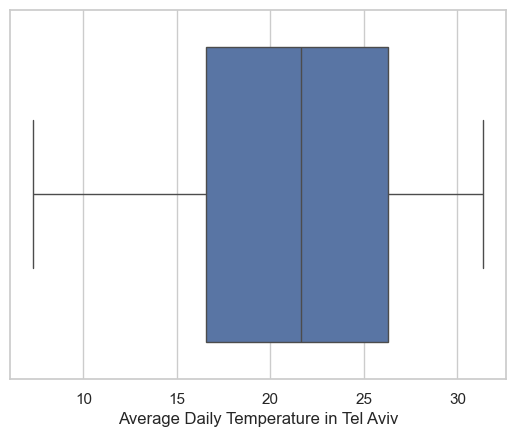

In [15]:
# make a box plot of temperature for the city you chose
fig, ax = plt.subplots()
# ax = sns.boxplot(x=TA_temp.AvgTemp_C)
sns.boxplot(x=TA_temp['AvgTemp_C'], ax=ax)
ax.set(xlabel=f'Average Daily Temperature in {city}')

/var/folders/wn/2bz1970d2w5182zy7h96yfcc0000gn/T/ipykernel_82655/3601528637.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['AvgTemp_C'] = (temp_df['AvgTemperature'] - 32)*(5/9)


[Text(0.5, 0, 'Average Daily Temperature')]

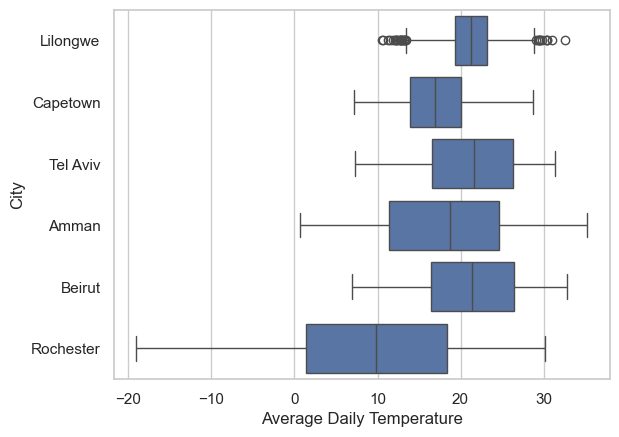

In [16]:
# compare all the cities

# clean data
temp_df = temp_df.loc[temp_df['AvgTemperature']>(-50)]
temp_df['AvgTemp_C'] = (temp_df['AvgTemperature'] - 32)*(5/9)

# plot
fig, ax = plt.subplots()
sns.boxplot(x=temp_df['AvgTemp_C'], y=temp_df['City'], ax=ax)
ax.set(xlabel='Average Daily Temperature')

[Text(0.5, 0, 'Average Daily Temperature')]

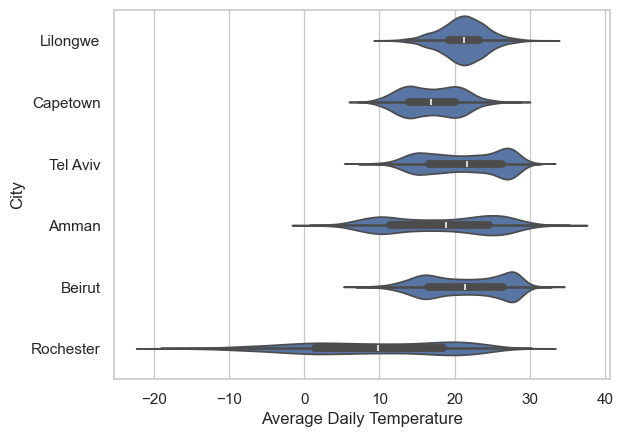

In [17]:
# make a violin plot of the temperature
fig, ax = plt.subplots()
sns.violinplot(x=temp_df['AvgTemp_C'], y=temp_df['City'], ax=ax)
ax.set(xlabel='Average Daily Temperature')

## Try out
1. plot the Average Daily Temperature of the year 2000 for all cities
1. plot the Average Daily Temperature of January 1st for all cities in all years

[Text(0.5, 0, 'Average Daily Temperature in 2000')]

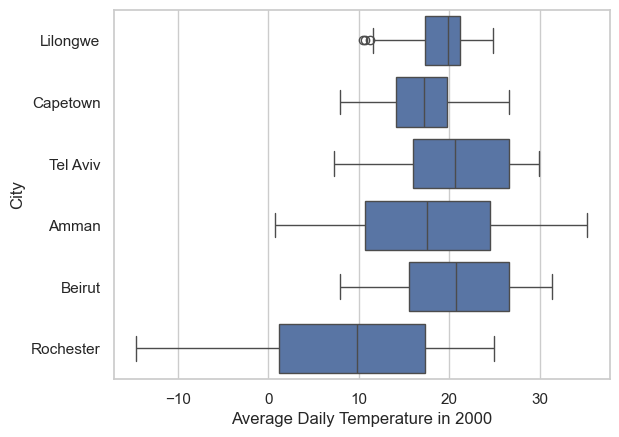

In [18]:
#| code-fold: true
#| code-summary: "Answer for 1"
milenium = temp_df.loc[temp_df['Year'] == 2000]
# plot
fig, ax = plt.subplots()
sns.boxplot(data=milenium, x='AvgTemp_C', y='City', ax=ax)
ax.set(xlabel='Average Daily Temperature in 2000')

[Text(0.5, 0, 'Average Daily Temperature on Jan 1st')]

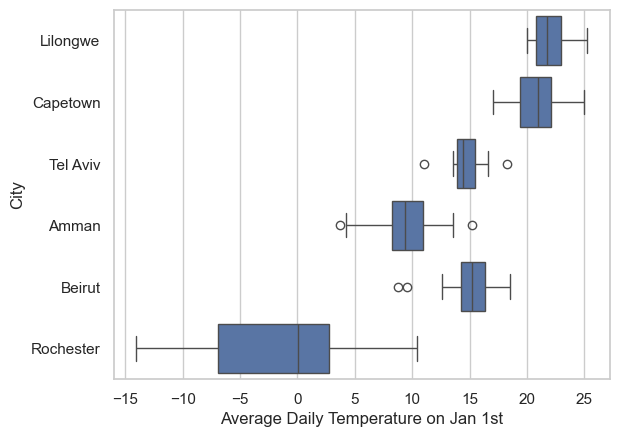

In [19]:
#| code-fold: true
#| code-summary: "Answer for 2"
jan_df = temp_df.loc[(temp_df['Day'] == 1)&((temp_df['Month'] == 1))]
# plot
fig, ax = plt.subplots()
sns.boxplot(data=jan_df, x='AvgTemp_C', y='City', ax=ax)
ax.set(xlabel='Average Daily Temperature on Jan 1st')

[Text(0.5, 0, 'Average Daily Temperature in Tel Aviv')]

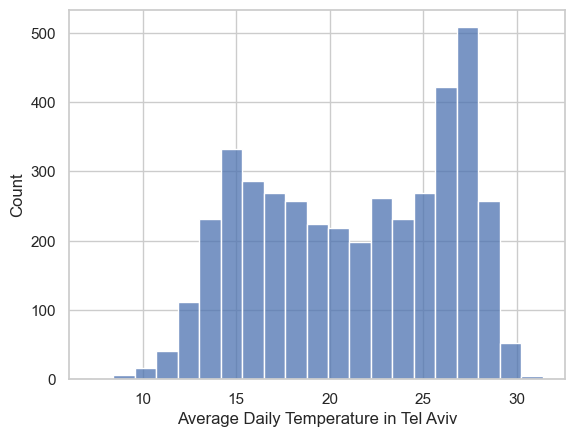

In [20]:
# make a histogram of the data for the city you chose
fig, ax = plt.subplots()
sns.histplot(x=TA_temp['AvgTemp_C'], ax=ax)
ax.set(xlabel=f'Average Daily Temperature in {city}')

[Text(0.5, 0, 'Average Daily Temperature')]

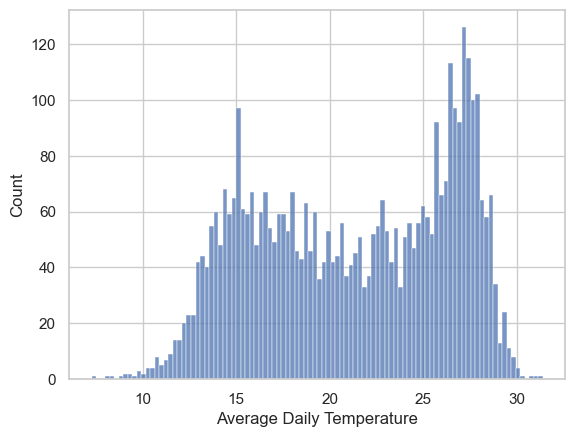

In [36]:
# play around with the bin size for the histogram -- try more bins
fig, ax = plt.subplots()
sns.histplot(x=TA_temp['AvgTemp_C'], bins=100, ax=ax)
ax.set(xlabel='Average Daily Temperature')

[Text(0.5, 0, 'Average Daily Temperature')]

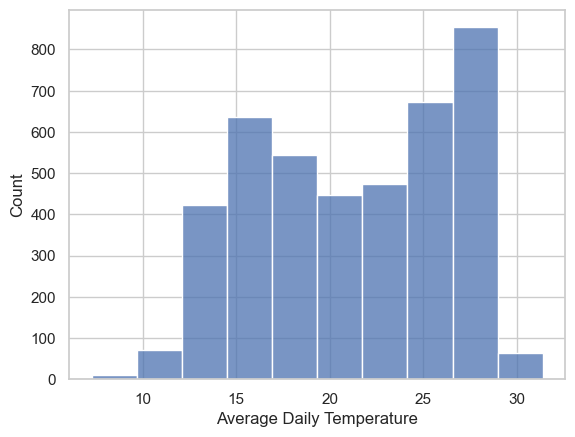

In [22]:
# now fewer bins
fig, ax = plt.subplots()
sns.histplot(x=TA_temp.AvgTemp_C, bins=10, ax=ax)
ax.set(xlabel='Average Daily Temperature')

[Text(0.5, 0, 'Average Daily Temperature')]

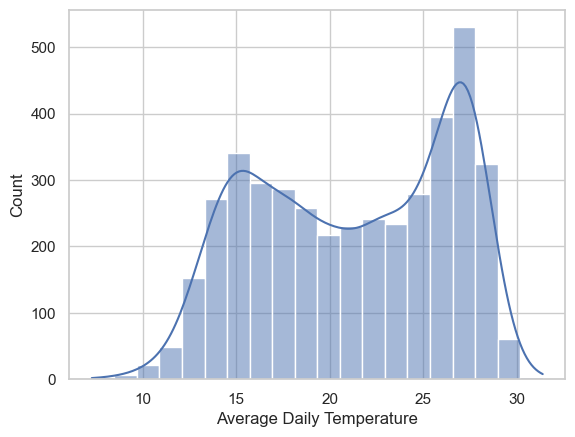

In [23]:
# add kernel density estimator
fig, ax = plt.subplots()
sns.histplot(x=TA_temp.AvgTemp_C, bins=20, kde = True, ax=ax)
ax.set(xlabel='Average Daily Temperature')

[Text(0.5, 0, 'Average Daily Temperature')]

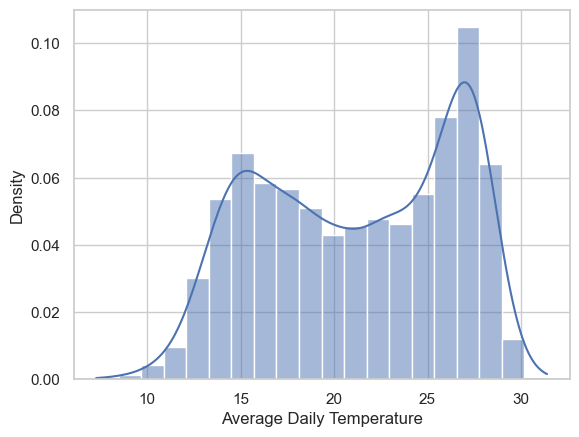

In [24]:
# how can we normalize the histogram data?
fig, ax = plt.subplots()
sns.histplot(x=TA_temp['AvgTemp_C'], bins=20, kde=True, stat="density", ax=ax)
ax.set(xlabel='Average Daily Temperature')

what's the difference between the "density" stat and "probablity" stat? read the [documentation](https://seaborn.pydata.org/generated/seaborn.histplot.html).

[Text(0.5, 1.0, 'density'), Text(0.5, 0, 'Average Daily Temperature')]

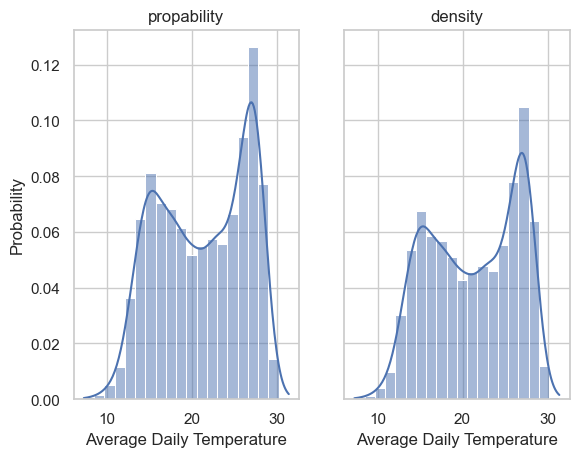

In [26]:
# plotting 2 side by side
fig, ax = plt.subplots(1,2, sharey=True)

sns.histplot(x=TA_temp.AvgTemp_C, bins=20, kde=True, stat="probability", ax=ax[0])
ax[0].set(title='propability', xlabel='Average Daily Temperature')

sns.histplot(x=TA_temp.AvgTemp_C, bins=20, kde=True, stat="density", ax=ax[1])
ax[1].set(title='density', xlabel='Average Daily Temperature')

Text(21.249324753733717, 0.14, 'mean')

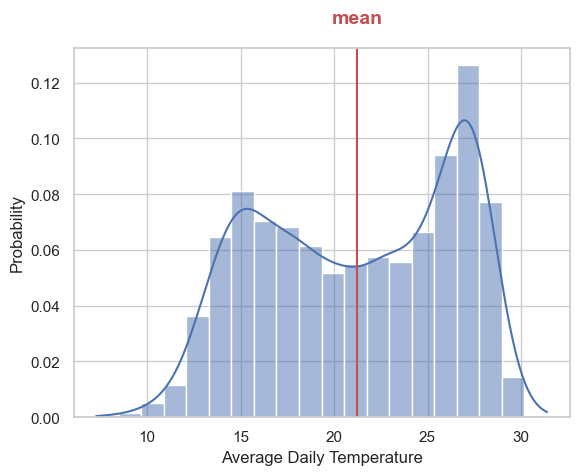

In [27]:
# add the mean to the plot
mean_temp = TA_temp['AvgTemp_C'].mean() 

fig, ax = plt.subplots()
sns.histplot(x=TA_temp['AvgTemp_C'], 
             bins=20,
             kde=True,
             stat="probability",
             ax=ax,
             )
ax.set(xlabel='Average Daily Temperature')
ax.axvline(mean_temp, label='mean', color='r')
ax.text(mean_temp,0.14, 'mean', va='bottom',
        ha='center', fontsize=14, weight='bold', color='r') 

## Try out
* add the mode
* add the median

[Text(0.5, 0, 'Average Daily Temperature')]

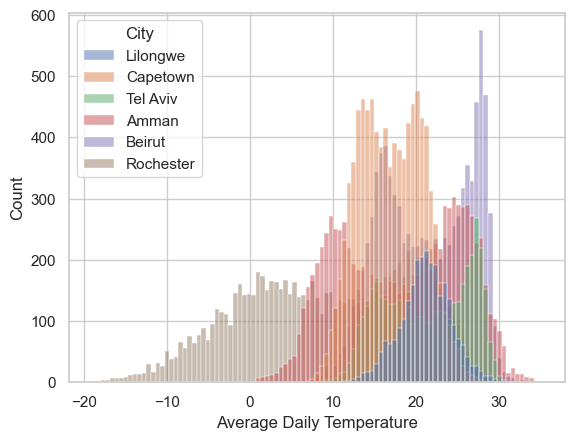

In [28]:
# make a histogram of the data
fig, ax = plt.subplots()
sns.histplot(x=temp_df['AvgTemp_C'], hue=temp_df['City'], ax=ax)
ax.set(xlabel='Average Daily Temperature')

<Axes: xlabel='AvgTemp_C', ylabel='City'>

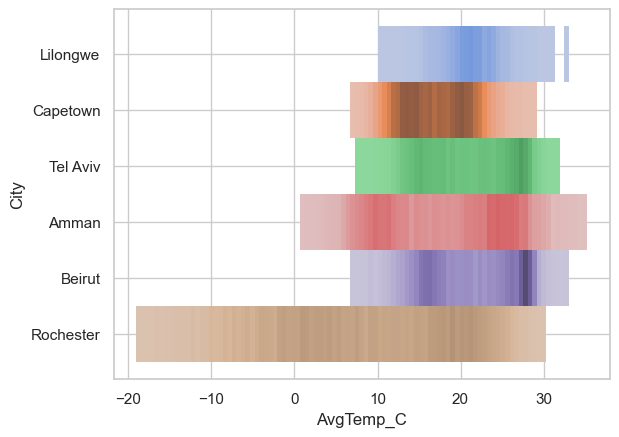

In [29]:
# another type of histogram
fig, ax = plt.subplots()
sns.histplot(x=temp_df['AvgTemp_C'], y=temp_df['City'], 
             hue=temp_df['City'], legend=False, ax=ax)

## Encoding categorical variables

Sometimes, for reasons that will be clear on the HW, we'll want to encode our categorical variables so that they are numbers instead. 

There are many ways that we can achive this. 

Here will learn one, for more examples see: https://pbpython.com/categorical-encoding.html

In [30]:
# what are our cities again?
temp_df['City'].unique()

array(['Lilongwe', 'Capetown', 'Tel Aviv', 'Amman', 'Beirut', 'Rochester'],
      dtype=object)

In [31]:
# dictionary for encoding cities (note: we can encode more than one variable at a time)
cleanup_cities = {"City": {"Lilongwe": 1, 
                           "Capetown": 2,
                           "Tel Aviv": 3,
                           "Amman": 4,
                           "Beirut": 5,
                           "Rochester": 6}}

In [32]:
# new dataframe with encoded values
temp_df_encoded = temp_df.replace(cleanup_cities)
temp_df_encoded.dtypes


Country            object
City                int64
Month               int64
Day                 int64
Year                int64
AvgTemperature    float64
AvgTemp_C         float64
dtype: object

In [33]:
# option 2 -- use Pandas

# what are our data types?
temp_df.dtypes


Country            object
City               object
Month               int64
Day                 int64
Year                int64
AvgTemperature    float64
AvgTemp_C         float64
dtype: object

In [34]:
# assign city to be a categorical variable
temp_df["City"] = temp_df["City"].astype('category')
temp_df.dtypes


/var/folders/wn/2bz1970d2w5182zy7h96yfcc0000gn/T/ipykernel_82655/1724604918.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df["City"] = temp_df["City"].astype('category')


Country             object
City              category
Month                int64
Day                  int64
Year                 int64
AvgTemperature     float64
AvgTemp_C          float64
dtype: object

In [35]:
# use codes to encode variable
temp_df["City_encoded"] = temp_df["City"].cat.codes
temp_df.dtypes


/var/folders/wn/2bz1970d2w5182zy7h96yfcc0000gn/T/ipykernel_82655/3917241889.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df["City_encoded"] = temp_df["City"].cat.codes


Country             object
City              category
Month                int64
Day                  int64
Year                 int64
AvgTemperature     float64
AvgTemp_C          float64
City_encoded          int8
dtype: object